In [15]:
from datetime import datetime, timedelta
import pandas as pd

import timeutils
import dataloader as dl
from yieldcurve import YieldCurve
import cashflow as cf
import interest as ir
import liquidity as liq
import statstools as st

## Import the Bank's Portfolio and Bond Market

In [16]:
portfolio = dl.load_portfolio()
TODAY = timeutils.set_today()
portfolio

,account,account_name,volume,ir_binding,reprice_freq,spread,issue,maturity,repayment,payment_freq,yieldcurve
id,,,,,,,,,,,
1,cb_1,Cash and balances with central bank,930,FIX,1,5,2014-09-30,2014-10-01,BULLET,1,EUR01
2,mmp_1,Money market placements,1404,FIX,1,7,2014-08-30,2014-11-30,BULLET,1,EUR01
3,mmp_1,Money market placements,996,FIX,1,10,2014-06-15,2014-12-15,BULLET,1,EUR01
4,cl_1,Corporate loans,515,LIBOR,3,301,2014-05-15,2016-04-15,LINEAR,3,EUR01
5,cl_1,Corporate loans,655,LIBOR,6,414,2014-04-15,2016-04-15,LINEAR,6,EUR01
...,...,...,...,...,...,...,...,...,...,...,...
143,ret_td_1,Retail term deposit,-1229,FIX,1,48,2014-03-30,2015-08-30,BULLET,1,EUR01
144,ret_td_1,Retail term deposit,-2452,FIX,1,40,2014-02-28,2015-02-28,BULLET,1,EUR01
145,ret_td_1,Retail term deposit,-976,FIX,1,40,2014-01-28,2015-01-28,BULLET,1,EUR01


In [17]:
market = dl.load_market()
market

,type,date,rate,comment
0,EUR01,2014-09-01,0.300000,1M
1,EUR01,2014-12-01,0.336256,3M
2,EUR01,2015-03-01,-2.353646,6M
3,EUR01,2015-09-01,-5.691876,1Y
4,EUR01,2016-09-01,-5.654177,2Y
...,...,...,...,...
61,EUR02,2040-09-01,200.000000,26Y
62,EUR02,2041-09-01,200.000000,27Y
63,EUR02,2042-09-01,200.000000,28Y
64,EUR02,2043-09-01,200.000000,29Y


## Examples of amortisation schedules

In [18]:
volume = 7500
maturity = 3
rate = 0.01
display(cf.amortization_schedule(rate, maturity, volume, payment_type="BULLET"))
display(cf.amortization_schedule(rate, maturity, volume, payment_type='LINEAR'))
display(cf.amortization_schedule(rate, maturity, volume, payment_type='ANNUITY'))

,cashflow,interest,capital,remaining
0,75.0,75.0,0.0,7500.0
1,75.0,75.0,0.0,7500.0
2,7575.0,75.0,7500.0,0.0


,cashflow,interest,capital,remaining
0,2575.0,75.0,2500.0,7500.0
1,2550.0,50.0,2500.0,5000.0
2,2525.0,25.0,2500.0,2500.0


,cashflow,interest,capital,remaining
0,1922.108204,75.000000,1847.108204,5652.891796
1,1922.108204,56.528918,1865.579286,3787.312509
2,1922.108204,37.873125,1884.235079,1903.077430


## Yield Curve, Spot Yields, Forward Yields, and Floating Yields

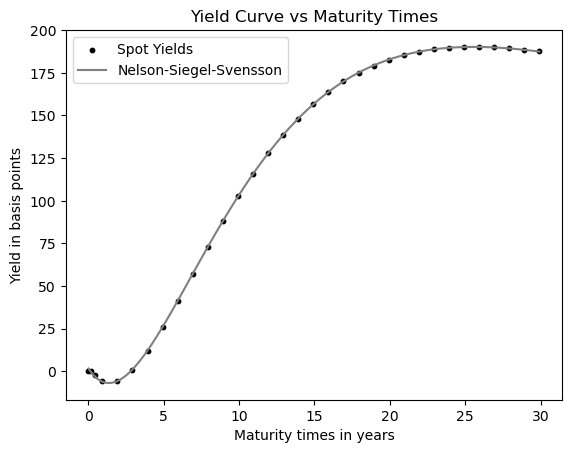

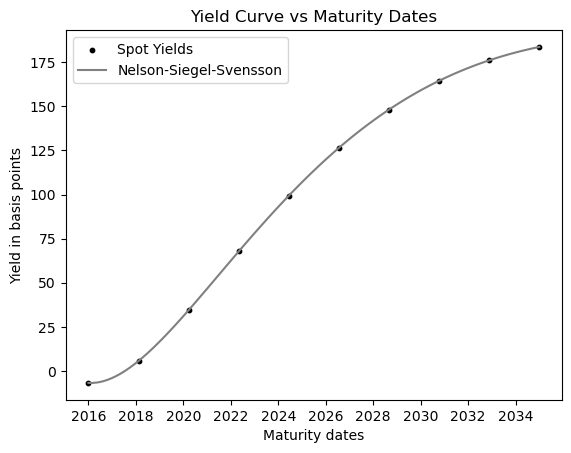

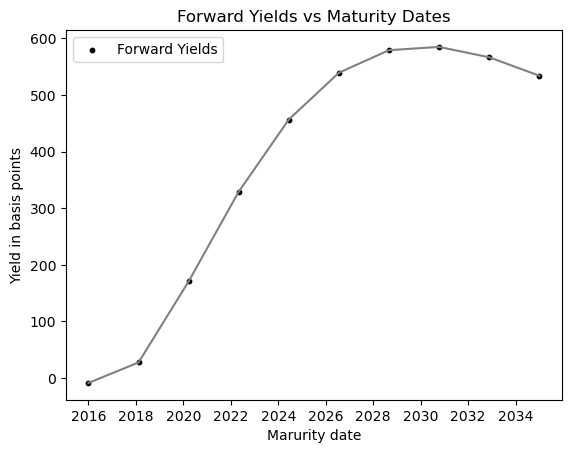

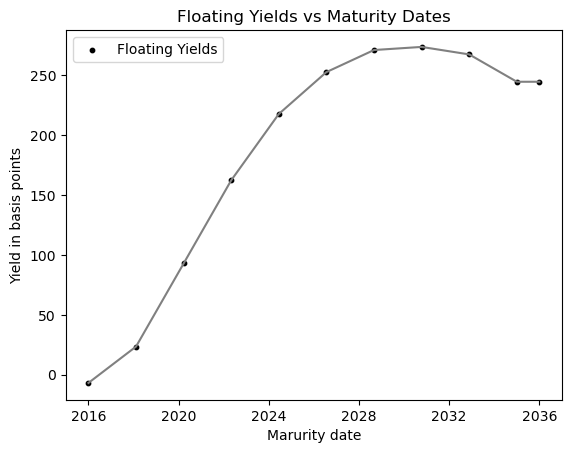

In [19]:
plot = True
EUR01 = YieldCurve(curve_type='EUR01', today=TODAY)
EUR01.fit(market, plot=plot)
date_list = timeutils.date_range('2016-01-01', '2035-01-01', 10)
spot_yields = EUR01.get_spot_yields(date_list, plot=plot)
forward_yields = EUR01.get_forward_yields(date_list, plot=plot)

date_list1 = timeutils.date_range('2016-01-01', '2035-01-01', 20)
date_list2 = timeutils.date_range('2016-01-01', '2035-01-01',10)
date_list2.append(datetime(2036,1,1))
floating_yields = EUR01.get_floating_yields(repayment_dates = date_list2, repricing_dates = date_list1, plot=plot)

## Asset Cashflows

In [20]:
display(portfolio.loc[10])
cf.asset_cashflow(portfolio, market, 10, TODAY)

account                        cl_1
account_name        Corporate loans
volume                          463
ir_binding                    LIBOR
reprice_freq                      3
spread                          332
issue           2013-11-15 00:00:00
maturity        2016-01-15 00:00:00
repayment                    LINEAR
payment_freq                      3
yieldcurve                    EUR01
Name: 10, dtype: object

,id,account,date,cashflow,interest,capital,remaining
0,10,cl_1,2014-10-15,81.010398,3.843732,77.166667,463.000000
1,10,cl_1,2015-01-15,80.369171,3.202504,77.166667,385.833333
2,10,cl_1,2015-04-15,79.720968,2.554301,77.166667,308.666667
3,10,cl_1,2015-07-15,79.077568,1.910901,77.166667,231.500000
4,10,cl_1,2015-10-15,78.438704,1.272038,77.166667,154.333333
5,10,cl_1,2016-01-15,77.802656,0.635989,77.166667,77.166667


## Portfolio Cashflows

In [21]:
portfolio_cashflow = cf.portfolio_cashflow(portfolio, market, TODAY)
display(portfolio_cashflow)

,id,account,date,cashflow,interest,capital,remaining
0,1,cb_1,2014-10-01,930.03875,0.03875,930.0,0.0
1,2,mmp_1,2014-10-30,0.08190,0.08190,0.0,1404.0
2,2,mmp_1,2014-11-30,1404.08190,0.08190,1404.0,0.0
3,3,mmp_1,2014-10-15,0.08300,0.08300,0.0,996.0
4,3,mmp_1,2014-11-15,0.08300,0.08300,0.0,996.0
...,...,...,...,...,...,...,...
10335,147,oth_l_1,2030-08-30,0.00000,-0.00000,0.0,-3930.0
10336,147,oth_l_1,2030-09-30,0.00000,-0.00000,0.0,-3930.0
10337,147,oth_l_1,2030-10-30,0.00000,-0.00000,0.0,-3930.0
10338,147,oth_l_1,2030-11-30,0.00000,-0.00000,0.0,-3930.0


In [22]:
ir.get_present_values(cashflows=portfolio_cashflow, market=market, today=TODAY)

,account,date,present_values
id,,,
1,cb_1,2014-09-30,930.038331
2,mmp_1,2014-09-30,1404.173476
3,mmp_1,2014-09-30,996.267185
4,cl_1,2014-09-30,530.700425
5,cl_1,2014-09-30,689.098535
...,...,...,...
143,ret_td_1,2014-09-30,-1235.085747
144,ret_td_1,2014-09-30,-2456.382170
145,ret_td_1,2014-09-30,-977.369632


## Net Interest Income Table

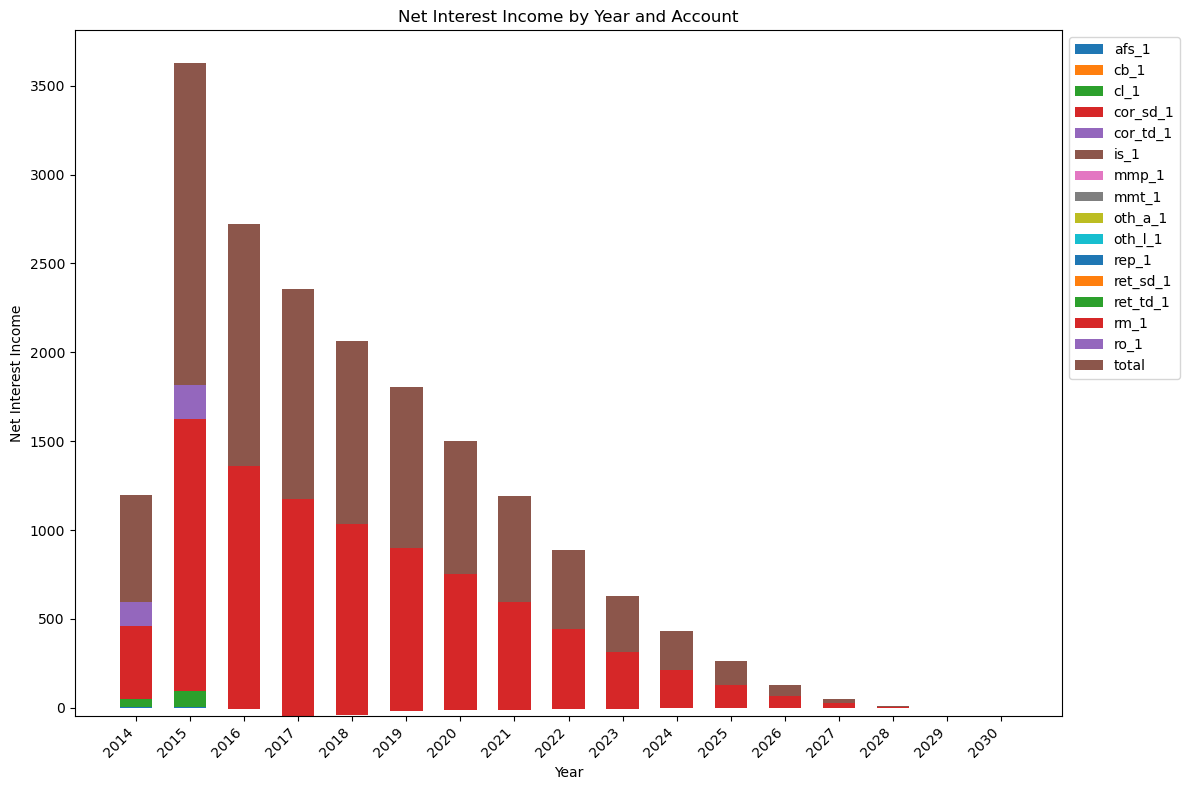

year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
account,,,,,,,,,,,,,,,,,
afs_1,6.99,3.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
cb_1,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
cl_1,98.65,230.73,95.20,34.66,3.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
cor_sd_1,-3.20,-11.16,-8.56,-5.96,-3.36,-0.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
cor_td_1,-5.60,-1.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
is_1,-26.19,-80.23,-65.82,-48.81,-22.20,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
mmp_1,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
mmt_1,-0.77,-1.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
oth_a_1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [23]:
nii = ir.nii_table(portfolio_cashflow, today=TODAY, plot=True)
display(round(nii,2))

## Repricing Gap for Asset

In [24]:
ir.repricing_gap(portfolio, 11, TODAY, 13)

,volume
1,332
2,0
3,0
4,0
5,0
6,0
7,332
8,0
9,0
10,0


## Repricing Gap for Portfolio

,1M,2M,3M,4M,5M,6M,7M,8M,9M,10M,11M,12M
volume,6100.0,9283.0,725.0,1787.0,7115.0,6560.0,1921.0,5919.0,2009.0,8649.0,6855.0,2730.0


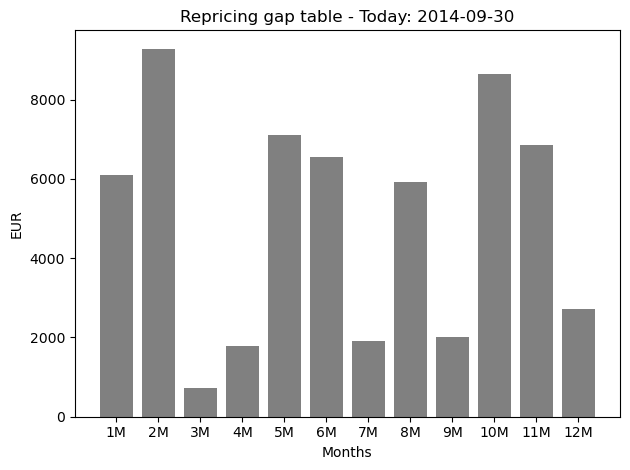

In [25]:
ir.repricing_gap_table(portfolio, today=TODAY, months_forward=12, plot=True)

In [26]:
portfolio_cashflow.groupby('date').sum().drop(columns=['id'])

,cashflow,interest,capital,remaining
date,,,,
2014-10-01,930.038750,0.038750,930.000000,0.000000
2014-10-14,0.624667,0.624667,0.000000,3748.000000
2014-10-15,536.203784,32.177227,504.026557,9849.000000
2014-10-28,469.683739,179.181876,290.501863,-8596.835196
2014-10-30,-4036.964850,-1.964850,-4035.000000,-3318.000000
...,...,...,...,...
2030-08-30,0.000000,0.000000,0.000000,-1630.000000
2030-09-30,0.000000,0.000000,0.000000,-1630.000000
2030-10-30,0.000000,0.000000,0.000000,-1630.000000


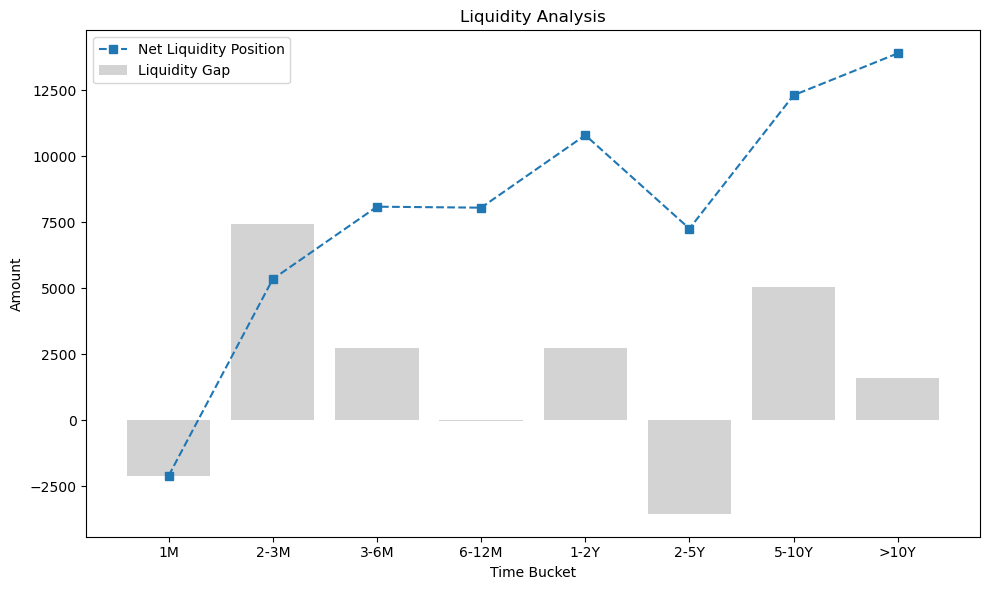

period,1M,2-3M,3-6M,6-12M,1-2Y,2-5Y,5-10Y,>10Y
account,,,,,,,,
afs_1,2.482767,3068.505933,14939.421667,0.000000,0.000000,0.000000,0.000000,0.000000
cb_1,930.038750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cl_1,1043.149506,1512.783768,1204.760005,2218.963229,2828.511308,1653.616057,0.000000,0.000000
cor_sd_1,-217.750000,-435.445833,-653.033333,-1088.027778,-2609.425000,-7812.675000,-216.684722,0.000000
cor_td_1,-1.901958,-439.661292,-6566.027050,0.000000,0.000000,0.000000,0.000000,0.000000
is_1,-8.713951,-17.476248,-2405.209065,-319.630095,-589.022746,-5255.191568,0.000000,0.000000
mmp_1,0.164900,2400.247900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mmt_1,-0.259542,-0.515383,-0.635353,-1201.917186,0.000000,0.000000,0.000000,0.000000
oth_a_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2300.000000


In [27]:
lq_table = liq.liquidity_table(portfolio_cashflow, today=TODAY, plot=True)
display(lq_table)

# Non-Maturity Deposits

In [28]:
pd.read_csv('data/ecb_nmd_data.csv')

,date,cpn,bal,eur1m
0,01/01/2003,1.11,30378,2.870
1,02/01/2003,1.06,30607,2.810
2,03/01/2003,1.03,30521,2.530
3,04/01/2003,0.99,31280,2.510
4,05/01/2003,0.99,32067,2.530
...,...,...,...,...
130,11/01/2013,0.38,89509,0.226
131,12/01/2013,0.38,89660,0.234
132,01/01/2014,0.38,89731,0.287
133,02/01/2014,0.38,89644,0.296


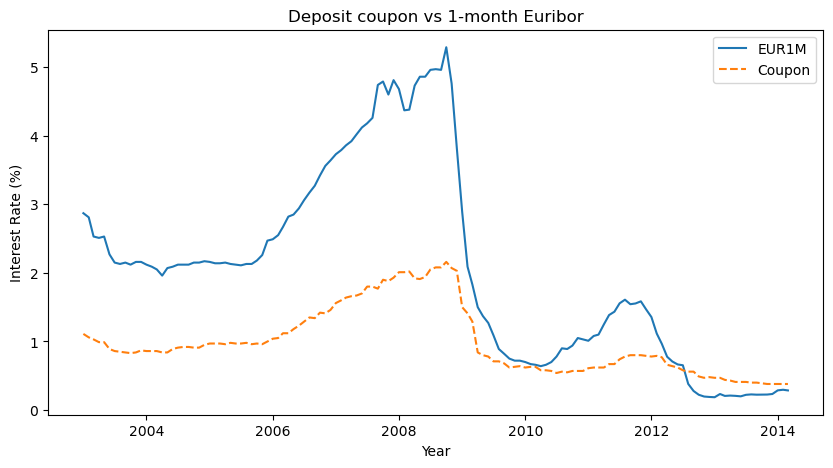

In [29]:
nmd = dl.load_non_maturity_deposits(plot=True)

In [31]:
nmd

,date,cpn,bal,eur1m
0,2003-01-01,1.11,30378,2.870
1,2003-02-01,1.06,30607,2.810
2,2003-03-01,1.03,30521,2.530
3,2003-04-01,0.99,31280,2.510
4,2003-05-01,0.99,32067,2.530
...,...,...,...,...
130,2013-11-01,0.38,89509,0.226
131,2013-12-01,0.38,89660,0.234
132,2014-01-01,0.38,89731,0.287
133,2014-02-01,0.38,89644,0.296


,date,EUR10Y,EUR1Y,EUR3M,EUR5Y,EUR1M
0,2004-09-01,4.104690,2.291667,2.045379,3.372940,2.120
1,2004-10-01,3.999926,2.217036,2.062055,3.220237,2.150
2,2004-11-01,3.891161,2.208084,2.097556,3.121089,2.150
3,2004-12-01,3.673262,2.192681,2.096897,2.977029,2.170
4,2005-01-01,3.597031,2.195882,2.056954,2.967852,2.160
...,...,...,...,...,...,...
110,2013-11-01,2.000219,0.038750,0.056704,0.830381,0.226
111,2013-12-01,2.127714,0.113502,0.118602,0.973776,0.234
112,2014-01-01,2.085456,0.095510,0.111668,0.939421,0.287
113,2014-02-01,1.904694,0.061613,0.119399,0.773455,0.296


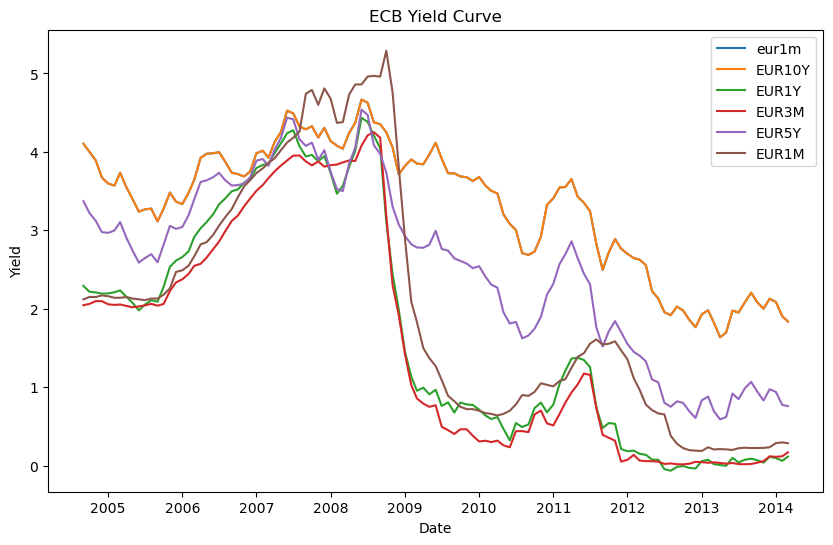

In [32]:
dl.load_yields(True)